In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
def create_dataset(dataset,look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX),numpy.array(dataY)

In [3]:
numpy.random.seed(7)
dataframe = pandas.read_csv("AirPassengers.csv",usecols=[1],engine="python")

In [4]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [6]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset)-train_size
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [10]:
look_back = 1
trainX,trainY = create_dataset(train,look_back)
testX,testY = create_dataset(test,look_back)

In [26]:
trainX = numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = numpy.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [43]:
model = Sequential()
model.add(LSTM(4,input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2)

/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  
W0426 19:32:05.645480 140039748347712 deprecation.py:506] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1633: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0426 19:32:06.648608 140039748347712 deprecation.py:323] From /home/arvind/.local/lib/python3.6/site-packages/keras/optimizers.py:550: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is depre

Epoch 1/100
 - 1s - loss: 0.0410
Epoch 2/100
 - 0s - loss: 0.0197
Epoch 3/100
 - 0s - loss: 0.0142
Epoch 4/100
 - 0s - loss: 0.0127
Epoch 5/100
 - 0s - loss: 0.0117
Epoch 6/100
 - 0s - loss: 0.0106
Epoch 7/100
 - 0s - loss: 0.0096
Epoch 8/100
 - 0s - loss: 0.0087
Epoch 9/100
 - 0s - loss: 0.0076
Epoch 10/100
 - 0s - loss: 0.0065
Epoch 11/100
 - 0s - loss: 0.0057
Epoch 12/100
 - 0s - loss: 0.0048
Epoch 13/100
 - 0s - loss: 0.0041
Epoch 14/100
 - 0s - loss: 0.0035
Epoch 15/100
 - 0s - loss: 0.0030
Epoch 16/100
 - 0s - loss: 0.0027
Epoch 17/100
 - 0s - loss: 0.0025
Epoch 18/100
 - 0s - loss: 0.0023
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0021
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0021
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0020
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0s - lo

In [44]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [45]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [46]:
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print("Train Score: %.2f RMSE"%(trainScore))

Train Score: 22.93 RMSE


In [47]:
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print("Test Score: %.2f RMSE"%(testScore))

Test Score: 47.60 RMSE


In [55]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

In [56]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

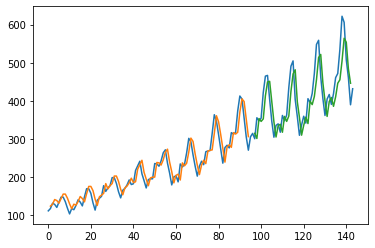

In [57]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [58]:
#LSTM for regression using window method

In [59]:
look_back = 3

In [60]:
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [62]:
trainX = numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = numpy.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [64]:
model = Sequential()
model.add(LSTM(4,input_dim=look_back))
model.add(Dense(1))
model.compile(loss = "mean_squared_error",optimizer="adam")
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2)

/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 3))`
  


Epoch 1/100
 - 0s - loss: 0.0515
Epoch 2/100
 - 0s - loss: 0.0242
Epoch 3/100
 - 0s - loss: 0.0157
Epoch 4/100
 - 0s - loss: 0.0134
Epoch 5/100
 - 0s - loss: 0.0120
Epoch 6/100
 - 0s - loss: 0.0106
Epoch 7/100
 - 0s - loss: 0.0094
Epoch 8/100
 - 0s - loss: 0.0082
Epoch 9/100
 - 0s - loss: 0.0072
Epoch 10/100
 - 0s - loss: 0.0063
Epoch 11/100
 - 0s - loss: 0.0056
Epoch 12/100
 - 0s - loss: 0.0050
Epoch 13/100
 - 0s - loss: 0.0046
Epoch 14/100
 - 0s - loss: 0.0043
Epoch 15/100
 - 0s - loss: 0.0041
Epoch 16/100
 - 0s - loss: 0.0039
Epoch 17/100
 - 0s - loss: 0.0038
Epoch 18/100
 - 0s - loss: 0.0038
Epoch 19/100
 - 0s - loss: 0.0036
Epoch 20/100
 - 0s - loss: 0.0036
Epoch 21/100
 - 0s - loss: 0.0036
Epoch 22/100
 - 0s - loss: 0.0035
Epoch 23/100
 - 0s - loss: 0.0035
Epoch 24/100
 - 0s - loss: 0.0036
Epoch 25/100
 - 0s - loss: 0.0034
Epoch 26/100
 - 0s - loss: 0.0034
Epoch 27/100
 - 0s - loss: 0.0033
Epoch 28/100
 - 0s - loss: 0.0033
Epoch 29/100
 - 0s - loss: 0.0033
Epoch 30/100
 - 0s - lo

In [65]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [66]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [67]:
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))

In [68]:
print("Train Score: %.2f RMSE"%(trainScore))

Train Score: 23.67 RMSE


In [69]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict

In [70]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+look_back*2+1:len(dataset)-1,:]=testPredict

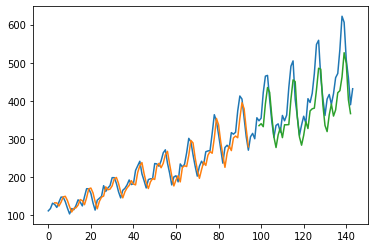

In [71]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
# LSTM for regression with time steps

In [73]:
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [75]:
trainX = numpy.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX = numpy.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [83]:
model = Sequential()
model.add(LSTM(4,input_dim=1))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2)

/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/arvind/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  


Epoch 1/100
 - 1s - loss: 0.0450
Epoch 2/100
 - 0s - loss: 0.0176
Epoch 3/100
 - 0s - loss: 0.0129
Epoch 4/100
 - 0s - loss: 0.0112
Epoch 5/100
 - 0s - loss: 0.0096
Epoch 6/100
 - 0s - loss: 0.0081
Epoch 7/100
 - 0s - loss: 0.0069
Epoch 8/100
 - 0s - loss: 0.0060
Epoch 9/100
 - 0s - loss: 0.0051
Epoch 10/100
 - 0s - loss: 0.0047
Epoch 11/100
 - 0s - loss: 0.0045
Epoch 12/100
 - 0s - loss: 0.0041
Epoch 13/100
 - 0s - loss: 0.0040
Epoch 14/100
 - 0s - loss: 0.0040
Epoch 15/100
 - 0s - loss: 0.0039
Epoch 16/100
 - 0s - loss: 0.0039
Epoch 17/100
 - 0s - loss: 0.0038
Epoch 18/100
 - 0s - loss: 0.0038
Epoch 19/100
 - 0s - loss: 0.0039
Epoch 20/100
 - 0s - loss: 0.0038
Epoch 21/100
 - 0s - loss: 0.0038
Epoch 22/100
 - 0s - loss: 0.0039
Epoch 23/100
 - 0s - loss: 0.0038
Epoch 24/100
 - 0s - loss: 0.0037
Epoch 25/100
 - 0s - loss: 0.0037
Epoch 26/100
 - 0s - loss: 0.0038
Epoch 27/100
 - 0s - loss: 0.0037
Epoch 28/100
 - 0s - loss: 0.0037
Epoch 29/100
 - 0s - loss: 0.0037
Epoch 30/100
 - 0s - lo

In [84]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [85]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [86]:
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print("Train Score: %.2f RMSE" %(trainScore))

Train Score: 28.03 RMSE


In [87]:
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print("Test Score: %.2f RMSE" %(testScore))

Test Score: 71.28 RMSE


In [89]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

In [90]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

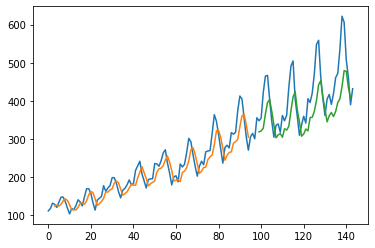

In [91]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [92]:
# LSTM with memory between batches

In [93]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [100]:
def create_dataset(dataset,look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX), numpy.array(dataY)

In [101]:
numpy.random.seed(7)

In [102]:
dataframe = pandas.read_csv('AirPassengers.csv',usecols=[1],engine="python")
dataset = dataframe.values
dataset = dataset.astype('float32')

In [103]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [104]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [105]:
look_back=3
trainX,trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [106]:
trainX = numpy.reshape(trainX,(trainX.shape[0], trainX.shape[1],1))
testX = numpy.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [107]:
batch_size=1
model = Sequential()
model.add(LSTM(4,batch_input_shape=(batch_size,look_back,1),stateful = True))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [108]:
for i in range(100):
    model.fit(trainX,trainY,epochs=1,batch_size=batch_size,verbose=2,shuffle = False)
    model.reset_states()

Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0078
Epoch 1/1
 - 0s - loss: 0.0052
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0045
Epoch 1/1
 - 0s - loss: 0.0044
Epoch 1/1
 - 0s - loss: 0.0044
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0042
Epoch 1/1
 - 0s - loss: 0.0042
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0036
Epoch 1/1
 - 0s - loss: 0.0036
Epoch 1/1
 - 0s - loss: 0.0035
Epoch 1/1
 - 0s - loss: 0.0035
Epoch 1/1
 - 0s - loss: 0.0034
Epoch 1/1
 - 0s - loss: 0.0033
Epoch 1/1
 - 0s - loss: 0.0033
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/

In [109]:
trainPredict = model.predict(trainX,batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX,batch_size=batch_size)

In [110]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [111]:
trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print("Train Score: %.2F rmse" % (trainScore))

Train Score: 20.57 rmse


In [112]:
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print("Test Score: %.2f RMSE"%(testScore))

Test Score: 52.74 RMSE


In [114]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

In [115]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

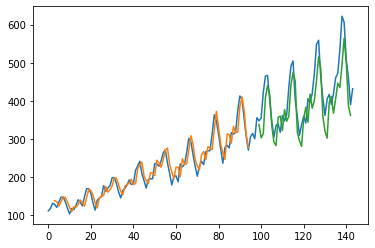

In [116]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [122]:
# Stacked LSTM

In [125]:
look_back=3
trainX,trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [126]:
trainX = numpy.reshape(trainX,(trainX.shape[0], trainX.shape[1],1))
testX = numpy.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [127]:
model = Sequential()
model.add(LSTM(4,batch_input_shape=(batch_size,look_back,1),stateful=True,return_sequences=True))
model.add(LSTM(4,batch_input_shape=(batch_size,look_back,1),stateful=True))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
for i in range(100):
    model.fit(trainX,trainY,epochs=1,batch_size=batch_size,verbose=2,shuffle = False)
    model.reset_states()

Epoch 1/1
 - 1s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0084
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 0s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0054
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0052
Epoch 1/1
 - 0s - loss: 0.0051
Epoch 1/1
 - 0s - loss: 0.0051
Epoch 1/1
 - 0s - loss: 0.0051
Epoch 1/1
 - 0s - loss: 0.0050
Epoch 1/1
 - 0s - loss: 0.0050
Epoch 1/1
 - 0s - loss: 0.0050
Epoch 1/1
 - 0s - loss: 0.0050
Epoch 1/1
 - 0s - loss: 0.0049
Epoch 1/1
 - 0s - loss: 0.0049
Epoch 1/1
 - 0s - loss: 0.0049
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0045
Epoch 1/1
 - 0s - loss: 0.0044
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0042
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0036
Epoch 1/

In [128]:
trainPredict=model.predict(trainX,batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX,batch_size=batch_size)

In [129]:
trainPredict=scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)

In [131]:
testY = scaler.inverse_transform([testY])

In [133]:
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print("Train Score %.2f RMSE" %(trainScore))

Train Score 22.54 RMSE


In [134]:
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print("Test Score %.2f RMSE" %(testScore))

Test Score 93.99 RMSE


In [135]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

In [138]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

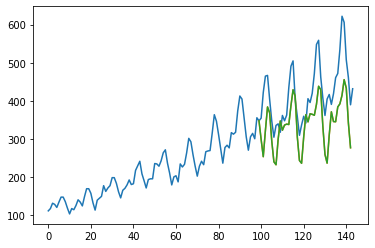

In [139]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()